<a href="https://colab.research.google.com/github/yuione51/sample/blob/main/student_vs_paid_member_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
student = pd.read_csv('전체회원수.csv', low_memory=False)

In [3]:
student.describe()

,학생SID,단말기구분,현재상품주문번호,학부모핸드폰번호,시리얼번호,유료상품 구매 개수,미납횟수,휴지 종료일,휴지종료일(과거)
count,1.166990e+05,0.0,1.166990e+05,1.166990e+05,0.0,116699.000000,116677.000000,10580.000000,0.0
mean,2.225547e+06,NaN,3.864194e+16,1.064281e+09,NaN,1.886486,0.224620,45071.117013,NaN
std,4.005250e+05,NaN,2.248865e+16,4.504112e+08,NaN,5.946305,0.663995,159.215511,NaN
min,9.300000e+01,NaN,3.100072e+13,0.000000e+00,NaN,0.000000,0.000000,44412.000000,NaN
25%,2.024190e+06,NaN,2.307260e+15,1.037185e+09,NaN,0.000000,0.000000,44984.000000,NaN
50%,2.319470e+06,NaN,5.209260e+16,1.055817e+09,NaN,0.000000,0.000000,45138.000000,NaN
75%,2.532526e+06,NaN,5.304240e+16,1.085667e+09,NaN,3.000000,0.000000,45174.000000,NaN
max,2.716371e+06,NaN,5.310310e+16,9.990000e+10,NaN,1060.000000,24.000000,45363.000000,NaN


In [4]:
print(student.columns)

Index(['학생명', '학생아이디', '학생SID', '팀명', '파트명', '관리교사명', '그룹', '학년', '학습계획시작일',
       '학습계획종료일', '최근계획수정일', '단말기구분', '상품명', '현재상품주문번호', '학습시작일', '학습마감일',
       '학부모집전화', '학부모핸드폰번호', '학생핸드폰번호', '휴회여부', '학부모주소', '학부모상세주소', '학부모앱사용여부',
       '시리얼번호', '최종맥로그인시리얼', '080수신여부 Y:수신거부자', '우편번호2', 'student_zipcode',
       'student_주소', '학생상세주소', '월결제 상태', '결제 날짜', '유료상품 구매 개수', '미납횟수',
       '학부모우편번호', 'sms수신여부', '학교명', '교사아이디', '학부모성함', '학부모아이디', '휴지여부',
       '휴지 종료일', '휴지여부(과거)', '휴지종료일(과거)', '체험상품여부N:유료', '최초결제 학습시작일', '주문상태',
       '학습상태', '상품종류', '해외학습여부', '기기타입', '관리유형'],
      dtype='object')


In [5]:
# 필요없는 columns 삭제

student = student.drop(['그룹', '학습계획시작일', '학습계획종료일', '최근계획수정일', '단말기구분', '시리얼번호', '최종맥로그인시리얼', '학부모앱사용여부', '휴지여부(과거)',
                        '휴지종료일(과거)', '휴회여부', 'student_zipcode', '유료상품 구매 개수', ], axis=1)

In [6]:
student = student.drop(['현재상품주문번호', '학부모집전화', '학생핸드폰번호','학부모상세주소', '080수신여부 Y:수신거부자', 'student_주소', '학생상세주소', '월결제 상태', '결제 날짜',
                        '미납횟수', 'sms수신여부', '학교명', '교사아이디', '학부모성함', '학부모아이디', '휴지여부', '휴지 종료일', '체험상품여부N:유료','해외학습여부', '기기타입', '관리유형'], axis=1)

In [7]:
print(student.columns)

Index(['학생명', '학생아이디', '학생SID', '팀명', '파트명', '관리교사명', '학년', '상품명', '학습시작일',
       '학습마감일', '학부모핸드폰번호', '학부모주소', '우편번호2', '학부모우편번호', '최초결제 학습시작일', '주문상태',
       '학습상태', '상품종류'],
      dtype='object')


In [9]:
# 테스트 계정, 테스트 상품으로 학습 중인 데이터 삭제

a_student = student[~student['학생명'].str.contains('테스트|test', case=False, na=False)]

In [10]:
a_student = a_student[~a_student['학생아이디'].str.contains('테스트|test', case=False, na=False)]

In [ ]:
a_student = a_student[~a_student['상품명'].str.contains('교사용|임직원', case=False, na=False)]

In [11]:
a_student.describe()


,학생SID,학부모핸드폰번호
count,1.143780e+05,1.143780e+05
mean,2.229307e+06,1.064925e+09
std,3.929377e+05,4.545232e+08
min,9.300000e+01,0.000000e+00
25%,2.028177e+06,1.037436e+09
50%,2.319778e+06,1.055958e+09
75%,2.532688e+06,1.085732e+09
max,2.716371e+06,9.990000e+10


In [12]:
# 유료 상품만 필터링

b_student = a_student[a_student['상품종류'] !='무료']

In [13]:
b_student.head()

,학생명,학생아이디,학생SID,팀명,파트명,관리교사명,학년,상품명,학습시작일,학습마감일,학부모핸드폰번호,학부모주소,우편번호2,학부모우편번호,최초결제 학습시작일,주문상태,학습상태,상품종류
0,시공함근영,museham90,93.0,NaN,본사,시공인호,4학년,[홈런] 초등 홈런 (임직원테스트용) 12개월,2023-09-19,2024-09-19,1.056427e+09,서울 강남구 영동대로 101 (개원중학교),06328,06328,2011-10-19,주문 완료,학습 진행,유료
2,류나영,sk1336,530.0,2지부,홍효정 팀,홍효정(팀장),6학년,[홈런] 초등홈런 12개월_교사용(기기배포),2022-11-28,2023-11-28,1.042600e+09,"인천 남동구 호구포로 803 (구월동, 롯데캐슬골드2단지아파트)",21562,21562,2011-11-09,주문 완료,체험 진행,유료
8,김연아,yuna0425,16845.0,학습 지원실,교사지원팀,서유정,3학년,[W형]아이스크림홈런 무료 학습_임직원,2023-04-17,2024-04-17,1.083537e+09,서울 강남구 역삼로88길 15,06187,06187,2012-03-06,주문 완료,학습 진행,유료
13,선동준2,dhsun03,27088.0,NaN,본사,유준희,4학년,[홈런] 초등 홈런 (임직원테스트용) 12개월,2023-02-17,2024-02-17,1.040434e+09,"서울 강동구 명일로24길 11-9 (길동, 태천해오름아파트)",05300,05300,2012-06-04,주문 완료,학습 진행,유료
14,김냥이,niang2,33918.0,3지부,김현화 팀,김현화(팀장),3학년,[홈런] 초등홈런 12개월_교사용(기기배포),2022-11-28,2023-11-28,1.086691e+09,경남 창원시 마산회원구 내서읍 광려로 29 (대동이미지아파트),51240,51240,2012-07-11,주문 완료,체험 진행,유료


In [14]:
b_student = b_student.drop(['학부모핸드폰번호'], axis=1)

In [15]:
# 우편번호 형식 수정
b_student['학부모우편번호'] = b_student['학부모우편번호'].str.replace('-', '')

In [16]:
b_student['학부모우편번호'] = b_student['학부모우편번호'].str.replace('?', '')

In [17]:
# 5자리 우편번호만 선택
valid_zipcode = b_student['학부모우편번호'].str.len() == 5
b_student = b_student[valid_zipcode]
b_student['학부모우편번호'] = b_student['학부모우편번호'].astype(str)
b_student = b_student.rename(columns={'학부모우편번호': '우편번호'})
print(b_student)

           학생명      학생아이디      학생SID      팀명       파트명    관리교사명    학년  \
0        시공함근영  museham90       93.0     NaN        본사     시공인호   4학년   
2          류나영     sk1336      530.0     2지부     홍효정 팀  홍효정(팀장)   6학년   
8          김연아   yuna0425    16845.0  학습 지원실     교사지원팀      서유정   3학년   
13        선동준2    dhsun03    27088.0     NaN        본사      유준희   4학년   
14         김냥이     niang2    33918.0     3지부     김현화 팀  김현화(팀장)   3학년   
...        ...        ...        ...     ...       ...      ...   ...   
114927    6세리틀   poolsupk  2543577.0   상담2센터  김수정팀(상담)   경설희(T)  -1학년   
114929   안보경리틀  swukyungk  2543590.0   상담2센터  김민경팀(상담)   안보경(T)  -2학년   
114932   이윤주리틀  pearl266k  2544825.0   상담2센터  김봉건팀(상담)  이윤주2(T)  -1학년   
114934   김은영초등     eyk901  2544858.0     NaN       NaN      NaN   3학년   
114935  김은영리틀2     eyk900  2544859.0     NaN       NaN      NaN  -1학년   

                              상품명       학습시작일       학습마감일  \
0       [홈런] 초등 홈런 (임직원테스트용) 12개월  2023-09-19  2024-09-19   
2

<ipython-input-17-66fabcd9756e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_student['학부모우편번호'] = b_student['학부모우편번호'].astype(str)


In [18]:
b_student.to_csv('b_student.csv', index=False)

In [19]:
import glob
from google.colab import files

In [21]:
# 모든 업로드된 txt 파일을 읽어서 하나의 데이터프레임으로 합치기
file_pattern = "*.txt"
all_files = glob.glob(file_pattern)
df_list = []

for file in all_files:
    df = pd.read_csv(file, sep='|', low_memory=False, dtype={'우편번호': str})
    df_list.append(df)

combined_df = pd.concat(df_list, ignore_index=True)

# 필요한 컬럼만 남기기
necessary_columns = ['우편번호', '시도']
filtered_df = combined_df[necessary_columns]

# 중복된 데이터 제거하기
unique_df = filtered_df.drop_duplicates()

# 결과를 엑셀 파일로 저장
unique_df.to_excel('combined_data.xlsx', index=False)

# 엑셀 파일 다운로드
files.download('combined_data.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
# 데이터 결합
c_student = pd.merge(b_student, unique_df, on='우편번호')

print(c_student.head())

     학생명      학생아이디      학생SID      팀명    파트명     관리교사명    학년  \
0  시공함근영  museham90       93.0     NaN     본사      시공인호   4학년   
1    함리틀  museham06  2713103.0  학습 지원실  리틀운영팀       박성혜  -1학년   
2    류나영     sk1336      530.0     2지부  홍효정 팀   홍효정(팀장)   6학년   
3    이주은   rmfpdltm  1267190.0   중등 관리  김혜정 팀  김은희(M28)   7학년   
4    김지율    yul0929   903982.0   중등 관리  용세민 팀  정정숙(M26)   8학년   

                                      상품명       학습시작일       학습마감일  \
0               [홈런] 초등 홈런 (임직원테스트용) 12개월  2023-09-19  2024-09-19   
1                [홈런] 리틀홈런 (임직원테스트용) 12개월  2023-10-25  2024-10-25   
2                [홈런] 초등홈런 12개월_교사용(기기배포)  2022-11-28  2023-11-28   
3  [중등][N형] 12개월 기간연장/학습기 변경(월분할결제_ARS)_R  2023-02-22  2024-03-21   
4                      [홈런] 중등 홈런 24개월 정가  2023-10-16  2025-10-16   

                                 학부모주소  우편번호2   우편번호  최초결제 학습시작일   주문상태  \
0              서울 강남구 영동대로 101 (개원중학교)  06328  06328  2011-10-19  주문 완료   
1              서울 강남구 영동대로 101 (개원중학교)  0632

In [23]:
c_student.to_excel('c_student.xlsx', index=False)

files.download('c_student.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [62]:
# 전국 학년별 학생수 데이터 불러오기

all_stu = pd.read_csv('전국_학년별_학생수.csv', low_memory=False)
all_stu.head()

,시도,1학년,2학년,3학년,4학년,5학년,6학년,7학년,8학년,9학년
0,서울,59123,62423,61422,61865,68827,66779,67059,63656,67933
1,부산,23616,25412,24995,24627,27187,26382,25899,23669,24874
2,대구,18838,19695,19595,19380,21564,20927,20755,19408,20483
3,인천,24025,25648,25139,25166,27655,27450,26749,25331,26005
4,광주,12507,13173,13259,13372,14985,14434,14538,13824,14243


In [63]:
# 전국 학년별 학생수 데이터와 동일한 학년만 필터링

c_student = c_student[~c_student['학년'].str.contains('-1학년|-2학년|-3학년|0학년|11학년|10학년|12학년', case=False, na=False)]

In [65]:
# '상품명' 열의 고유 값 확인
unique_product_names = c_student['학년'].unique()

# 고유 값 출력
print(unique_product_names)

['4학년' '6학년' '7학년' '8학년' '5학년' '3학년' '1학년' '2학년' '9학년']


In [66]:
# '시도' 열의 고유 값 확인
city_names = c_student['시도'].unique()

# 고유 값 출력
print(city_names )

['서울' '인천' '경남' '경기' '울산' '충남' '경북' '광주' '제주' '부산' '전남' '전북' '대구' '충북'
 '강원' '세종' '대전']


In [67]:
# 시도 열 데이터 값 통일

c_student['시도'] = c_student['시도'].replace({
    '인천광역시' : '인천',
    '경기도' : '경기',
    '울산광역시' : '울산',
    '충청남도' : '충남',
    '서울특별시' : '서울',
    '경상북도' : '경북',
    '광주광역시' : '광주',
    '경상남도' : '경남',
    '제주특별자치도' : '제주',
     '부산광역시' : '부산',
     '전라남도' : '전남',
     '전북특별자치도' : '전북',
    '대구광역시' : '대구',
    '충청북도' :'충북',
    '강원특별자치도' : '강원',
    '세종특별자치시' : '세종',
    '대전광역시' : '대전'

})

In [68]:
# '학년', '시도' 열만 선택
count_student = c_student[['학년', '시도']]

# 시도별 학년별 학생 수 구하기
group_st = count_student.groupby(by=['시도', '학년'], dropna=False).size().reset_index(name='학생수')

print(group_st)

     시도   학년  학생수
0    강원  1학년  223
1    강원  2학년  335
2    강원  3학년  523
3    강원  4학년  536
4    강원  5학년  569
..   ..  ...  ...
148  충북  5학년  457
149  충북  6학년  385
150  충북  7학년  205
151  충북  8학년  152
152  충북  9학년   67

[153 rows x 3 columns]


In [69]:
# 전국_학년별_학생수.csv 데이터 형식 변경

all_stu = pd.DataFrame(all_stu)
all_stu = all_stu.melt(id_vars=['시도'], var_name='학년', value_name='전국학생수')

print(all_stu)

     시도   학년  전국학생수
0    서울  1학년  59123
1    부산  1학년  23616
2    대구  1학년  18838
3    인천  1학년  24025
4    광주  1학년  12507
..   ..  ...    ...
148  전북  9학년  16128
149  전남  9학년  15309
150  경북  9학년  21071
151  경남  9학년  31414
152  제주  9학년   6557

[153 rows x 3 columns]


In [70]:
# 데이터 결합

stu_combined = pd.merge(group_st, all_stu, on=['시도', '학년'], how='left')

print(stu_combined)

     시도   학년  학생수  전국학생수
0    강원  1학년  223  10509
1    강원  2학년  335  11165
2    강원  3학년  523  11050
3    강원  4학년  536  11285
4    강원  5학년  569  12724
..   ..  ...  ...    ...
148  충북  5학년  457  14737
149  충북  6학년  385  14505
150  충북  7학년  205  14457
151  충북  8학년  152  13592
152  충북  9학년   67  13958

[153 rows x 4 columns]


In [71]:
# 시도별 합계 계산
grouped = stu_combined.groupby('시도').agg({
    '학생수': 'sum',
    '전국학생수': 'sum'
}).reset_index()

# '학년' 컬럼에 '합계' 추가
grouped['학년'] = '합계'

# 원래 데이터프레임에 시도별 합계 추가
result = pd.concat([stu_combined, grouped], ignore_index=True)

# 정렬: '시도'와 '학년'으로 정렬하여 합계를 각 시도 아래로 배치
result = result.sort_values(by=['시도', '학년'], key=lambda col: col.map(lambda x: '0' if x == '합계' else x)).reset_index(drop=True)

print(result)

     시도   학년   학생수   전국학생수
0    강원   합계  3182  106171
1    강원  1학년   223   10509
2    강원  2학년   335   11165
3    강원  3학년   523   11050
4    강원  4학년   536   11285
..   ..  ...   ...     ...
165  충북  5학년   457   14737
166  충북  6학년   385   14505
167  충북  7학년   205   14457
168  충북  8학년   152   13592
169  충북  9학년    67   13958

[170 rows x 4 columns]


In [72]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

In [73]:
import sys
if 'google.colab' in sys.modules:
  !echo 'debconf debconf/frontend select Noninteractive' |\
  debconf-set-selections

In [74]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import pandas as pd

# 폰트 경로 설정
font_path = '/content/malgun.ttf'

# 폰트 매니저에 폰트 추가
fm.fontManager.addfont(font_path)
plt.rc('font', family='Malgun Gothic')


In [75]:
plt.rcParams['font.family']

['Malgun Gothic']

In [76]:
plt.rc('font', family = 'Malgun Gothic')

Grade: 1학년, Bar positions: (17,), Grade data: (17,)
Grade: 2학년, Bar positions: (17,), Grade data: (17,)
Grade: 3학년, Bar positions: (17,), Grade data: (17,)
Grade: 4학년, Bar positions: (17,), Grade data: (17,)
Grade: 5학년, Bar positions: (17,), Grade data: (17,)
Grade: 6학년, Bar positions: (17,), Grade data: (17,)
Grade: 7학년, Bar positions: (17,), Grade data: (17,)
Grade: 8학년, Bar positions: (17,), Grade data: (17,)
Grade: 9학년, Bar positions: (17,), Grade data: (17,)
Grade: 1학년, Bar positions: (17,), Grade data: (17,)
Grade: 2학년, Bar positions: (17,), Grade data: (17,)
Grade: 3학년, Bar positions: (17,), Grade data: (17,)
Grade: 4학년, Bar positions: (17,), Grade data: (17,)
Grade: 5학년, Bar positions: (17,), Grade data: (17,)
Grade: 6학년, Bar positions: (17,), Grade data: (17,)
Grade: 7학년, Bar positions: (17,), Grade data: (17,)
Grade: 8학년, Bar positions: (17,), Grade data: (17,)
Grade: 9학년, Bar positions: (17,), Grade data: (17,)


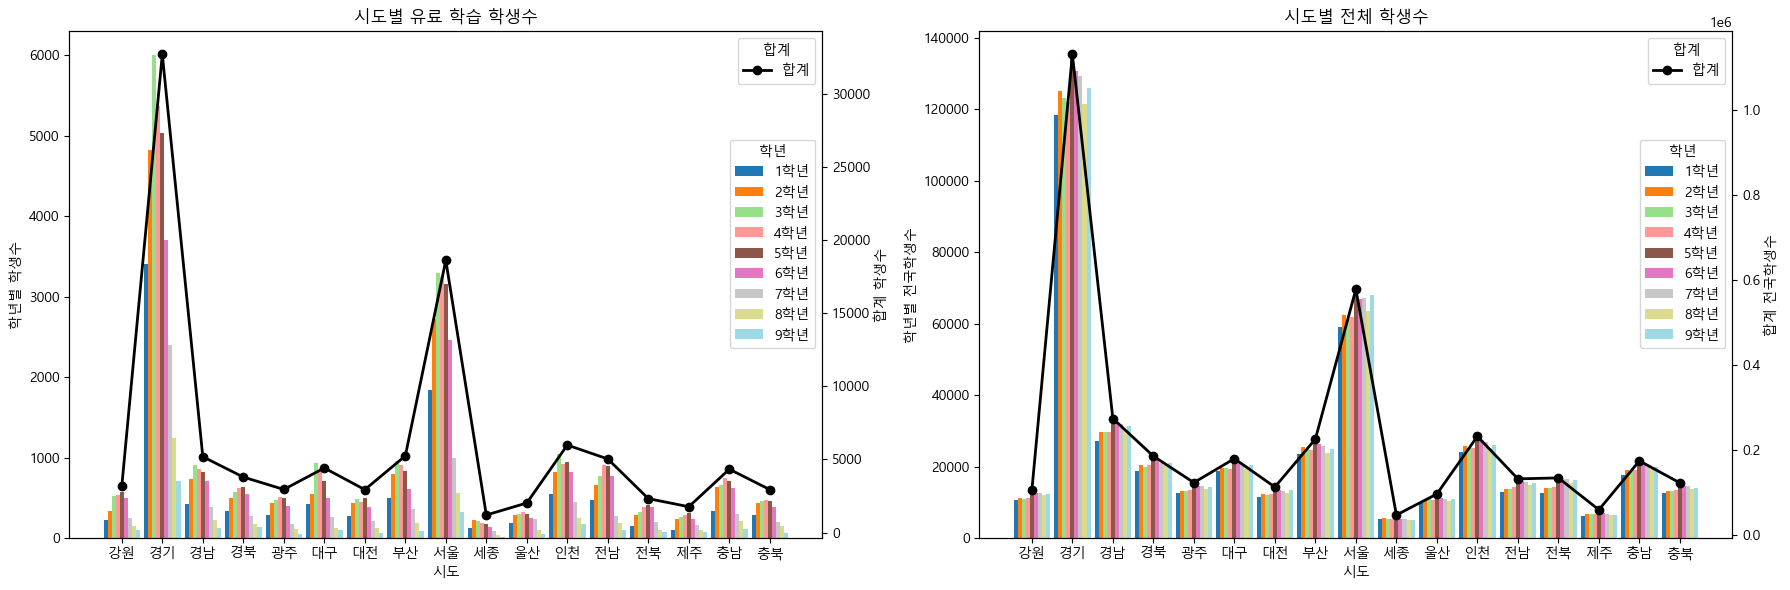

In [77]:
import numpy as np

# '합계' 행과 나머지 학년 구분
summary_data = result[result['학년'] == '합계']
result_filtered = result[result['학년'] != '합계']

# 학년 리스트와 시도 리스트 생성
grades = result_filtered['학년'].unique()
regions = result_filtered['시도'].unique()

# 각 학년별로 색상을 지정
colors = plt.cm.tab20(np.linspace(0, 1, len(grades)))

# 1x2 형태의 그래프 생성
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# 첫 번째 그래프: 시도별 유료 학습 학생수
bar_width = 0.1
for i, grade in enumerate(grades):
    grade_data = result_filtered[result_filtered['학년'] == grade]
    bar_positions = np.arange(len(regions)) + i * bar_width
    # 데이터의 모양 확인
    print(f'Grade: {grade}, Bar positions: {bar_positions.shape}, Grade data: {grade_data["학생수"].shape}')
    if len(grade_data) == len(bar_positions):
        ax1.bar(bar_positions, grade_data['학생수'], bar_width, label=grade, color=colors[i])

# x축 레이블 및 위치 설정
ax1.set_xticks(np.arange(len(regions)) + bar_width * (len(grades) - 1) / 2)
ax1.set_xticklabels(regions)

# 레이블 및 제목 설정
ax1.set_xlabel('시도')
ax1.set_ylabel('학년별 학생수')
ax1.set_title('시도별 유료 학습 학생수')

# x축 레이블 회전 및 겹치는 문제 해결
ax1.tick_params(axis='x', rotation=0)

# 선그래프 추가 (이중 y축)
if not summary_data.empty:
    ax1_twin = ax1.twinx()
    line1, = ax1_twin.plot(np.arange(len(regions)) + bar_width * (len(grades) - 1) / 2, summary_data['학생수'], color='black', marker='o', linestyle='-', linewidth=2, label='합계')
    ax1_twin.set_ylabel('합계 학생수')

# 두 번째 그래프: 시도별 전체 학생수
for i, grade in enumerate(grades):
    grade_data = result_filtered[result_filtered['학년'] == grade]
    bar_positions = np.arange(len(regions)) + i * bar_width
    # 데이터의 모양 확인
    print(f'Grade: {grade}, Bar positions: {bar_positions.shape}, Grade data: {grade_data["전국학생수"].shape}')
    if len(grade_data) == len(bar_positions):
        ax2.bar(bar_positions, grade_data['전국학생수'], bar_width, label=grade, color=colors[i])

# x축 레이블 및 위치 설정
ax2.set_xticks(np.arange(len(regions)) + bar_width * (len(grades) - 1) / 2)
ax2.set_xticklabels(regions)

# 레이블 및 제목 설정
ax2.set_xlabel('시도')
ax2.set_ylabel('학년별 전국학생수')
ax2.set_title('시도별 전체 학생수')

# x축 레이블 회전 및 겹치는 문제 해결
ax2.tick_params(axis='x', rotation=0)

# 선그래프 추가 (이중 y축)
if not summary_data.empty:
    ax2_twin = ax2.twinx()
    line2, = ax2_twin.plot(np.arange(len(regions)) + bar_width * (len(grades) - 1) / 2, summary_data['전국학생수'], color='black', marker='o', linestyle='-', linewidth=2, label='합계')
    ax2_twin.set_ylabel('합계 전국학생수')

# 첫 번째 그래프 범례 설정
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = [line1], ['합계'] if not summary_data.empty else ([], [])

# 학년 범례 추가
legend1 = ax1.legend(handles=handles1, title='학년', loc='upper right', bbox_to_anchor=(1, 0.8))
# 합계 범례 추가
if handles2:
    legend2 = ax1.legend(handles=handles2, title='합계', loc='upper right')
    ax1.add_artist(legend1)

# 두 번째 그래프 범례 설정
handles3, labels3 = ax2.get_legend_handles_labels()
handles4, labels4 = [line2], ['합계'] if not summary_data.empty else ([], [])

# 학년 범례 추가
legend3 = ax2.legend(handles=handles3, title='학년', loc='upper right', bbox_to_anchor=(1, 0.8))
# 합계 범례 추가
if handles4:
    legend4 = ax2.legend(handles=handles4, title='합계', loc='upper right')
    ax2.add_artist(legend3)

plt.tight_layout()
fig.savefig('시도별 학생수.png')
plt.show()

In [78]:
# 비율 계산
result['비율'] = (result['학생수'] / result['전국학생수']) * 100

# 비율을 백분율 형식으로 변환하여 표시
result['비율'] = result['비율'].map("{:.2f}%".format)

# 결과 출력
print(result)

     시도   학년   학생수   전국학생수     비율
0    강원   합계  3182  106171  3.00%
1    강원  1학년   223   10509  2.12%
2    강원  2학년   335   11165  3.00%
3    강원  3학년   523   11050  4.73%
4    강원  4학년   536   11285  4.75%
..   ..  ...   ...     ...    ...
165  충북  5학년   457   14737  3.10%
166  충북  6학년   385   14505  2.65%
167  충북  7학년   205   14457  1.42%
168  충북  8학년   152   13592  1.12%
169  충북  9학년    67   13958  0.48%

[170 rows x 5 columns]


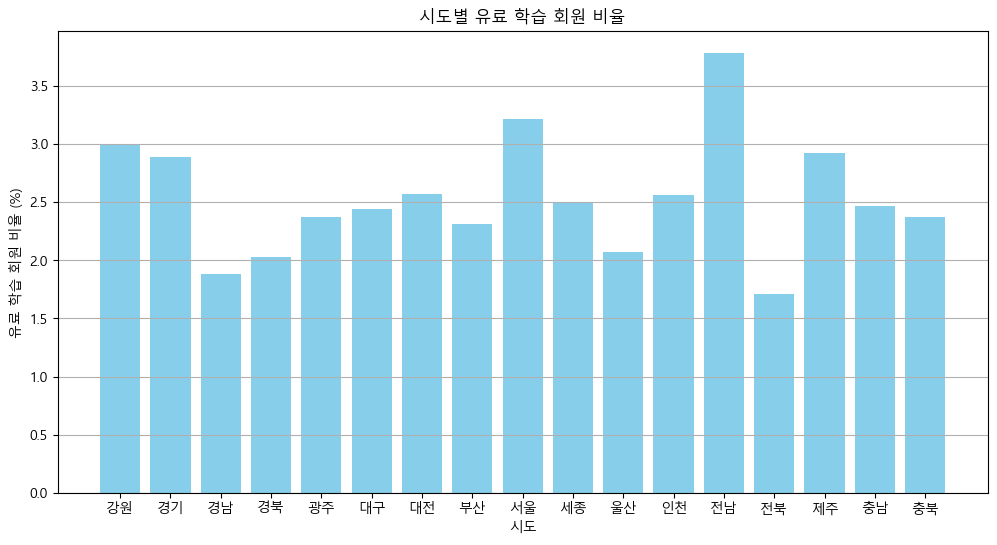

In [79]:
# '합계' 행만 필터링
summary_data = result[result['학년'] == '합계'].copy()

# 비율에서 '%' 기호 제거 및 숫자로 변환
summary_data.loc[:, '비율'] = summary_data['비율'].str.rstrip('%').astype(float)

# 시각화
plt.figure(figsize=(12, 6))
plt.bar(summary_data['시도'], summary_data['비율'], color='skyblue')
plt.xlabel('시도')
plt.ylabel('유료 학습 회원 비율 (%)')
plt.title('시도별 유료 학습 회원 비율')
plt.grid(axis='y')
plt.show()

In [80]:
from scipy.stats import ttest_ind

# 시도별 비율 비교 t-검정
results = []
for region in summary_data['시도']:
    region1 = summary_data[summary_data['시도'] == region]['비율'].values
    region2 = summary_data[summary_data['시도'] != region]['비율'].values

    t_stat, p_value = ttest_ind(region1.astype(float), region2.astype(float))
    results.append({
        '지역': region,
        't-통계량': t_stat,
        'p-값': p_value
    })

# 결과를 데이터프레임으로 변환 및 출력
results_df = pd.DataFrame(results)
print(results_df)

    지역     t-통계량       p-값
0   강원  0.934865  0.364665
1   경기  0.705907  0.491065
2   경남 -1.348114  0.197629
3   경북 -1.014027  0.326648
4   광주 -0.319667  0.753630
5   대구 -0.182413  0.857701
6   대전  0.071063  0.944286
7   부산 -0.438253  0.667449
8   서울  1.401516  0.181411
9   세종 -0.084823  0.933524
10  울산 -0.928630  0.367784
11  인천  0.051574  0.959549
12  전남  3.117158  0.007065
13  전북 -1.762735  0.098302
14  제주  0.767555  0.454665
15  충남 -0.123830  0.903094
16  충북 -0.319667  0.753630


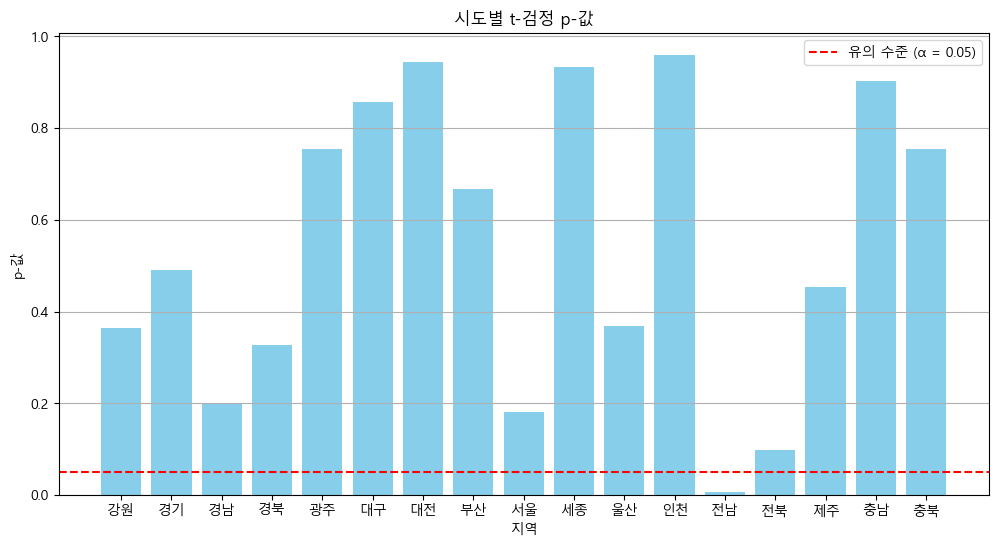

In [81]:
# p-값 시각화
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(results_df['지역'], results_df['p-값'], color='skyblue')
ax.axhline(y=0.05, color='r', linestyle='--', label='유의 수준 (α = 0.05)')
ax.set_xlabel('지역')
ax.set_ylabel('p-값')
ax.set_title('시도별 t-검정 p-값')
ax.legend()
ax.grid(axis='y')

fig.savefig('t검정.png')
plt.show()

In [82]:
print(result)

     시도   학년   학생수   전국학생수     비율
0    강원   합계  3182  106171  3.00%
1    강원  1학년   223   10509  2.12%
2    강원  2학년   335   11165  3.00%
3    강원  3학년   523   11050  4.73%
4    강원  4학년   536   11285  4.75%
..   ..  ...   ...     ...    ...
165  충북  5학년   457   14737  3.10%
166  충북  6학년   385   14505  2.65%
167  충북  7학년   205   14457  1.42%
168  충북  8학년   152   13592  1.12%
169  충북  9학년    67   13958  0.48%

[170 rows x 5 columns]


In [83]:
# 비율에서 '%' 기호 제거 및 숫자로 변환
result['비율'] = result['비율'].astype(str).str.rstrip('%').astype(float)

print(result)

     시도   학년   학생수   전국학생수    비율
0    강원   합계  3182  106171  3.00
1    강원  1학년   223   10509  2.12
2    강원  2학년   335   11165  3.00
3    강원  3학년   523   11050  4.73
4    강원  4학년   536   11285  4.75
..   ..  ...   ...     ...   ...
165  충북  5학년   457   14737  3.10
166  충북  6학년   385   14505  2.65
167  충북  7학년   205   14457  1.42
168  충북  8학년   152   13592  1.12
169  충북  9학년    67   13958  0.48

[170 rows x 5 columns]


<ipython-input-85-636e59389fa2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='시도', y='비율', data=grade_data, palette='viridis')


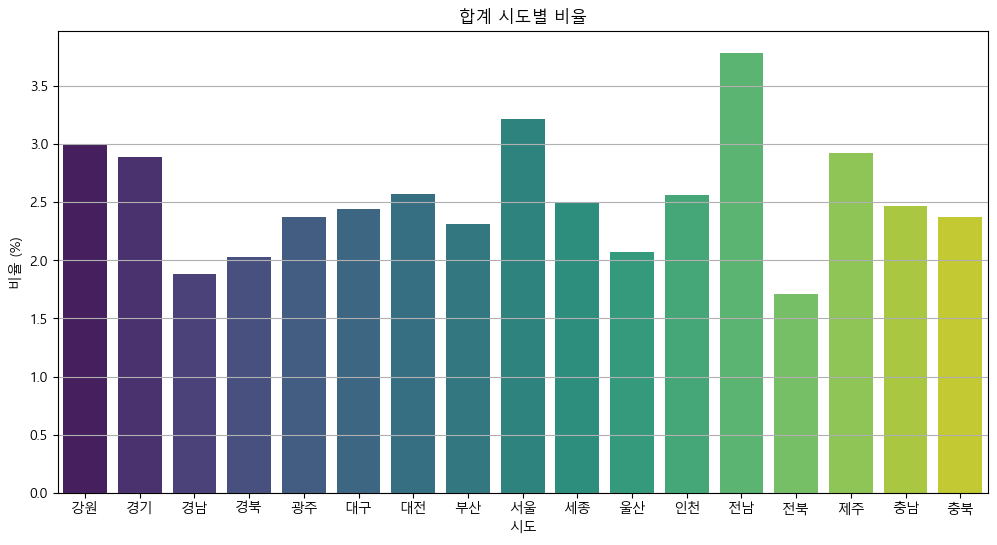

<ipython-input-85-636e59389fa2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='시도', y='비율', data=grade_data, palette='viridis')


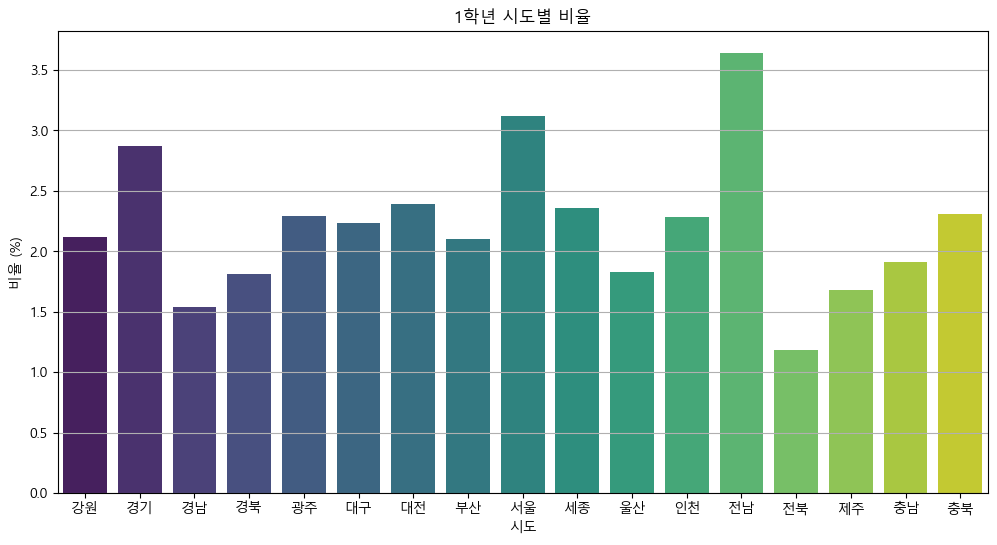

<ipython-input-85-636e59389fa2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='시도', y='비율', data=grade_data, palette='viridis')


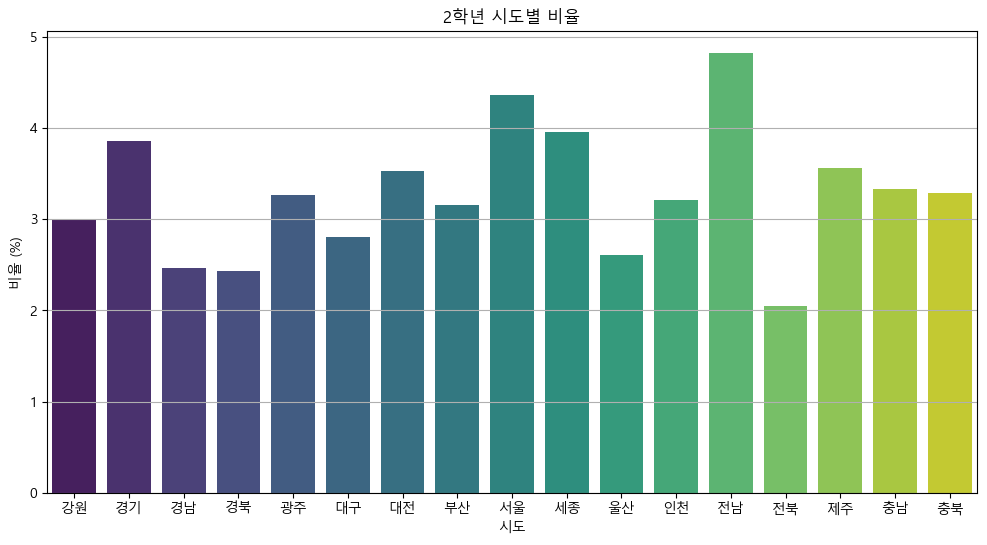

<ipython-input-85-636e59389fa2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='시도', y='비율', data=grade_data, palette='viridis')


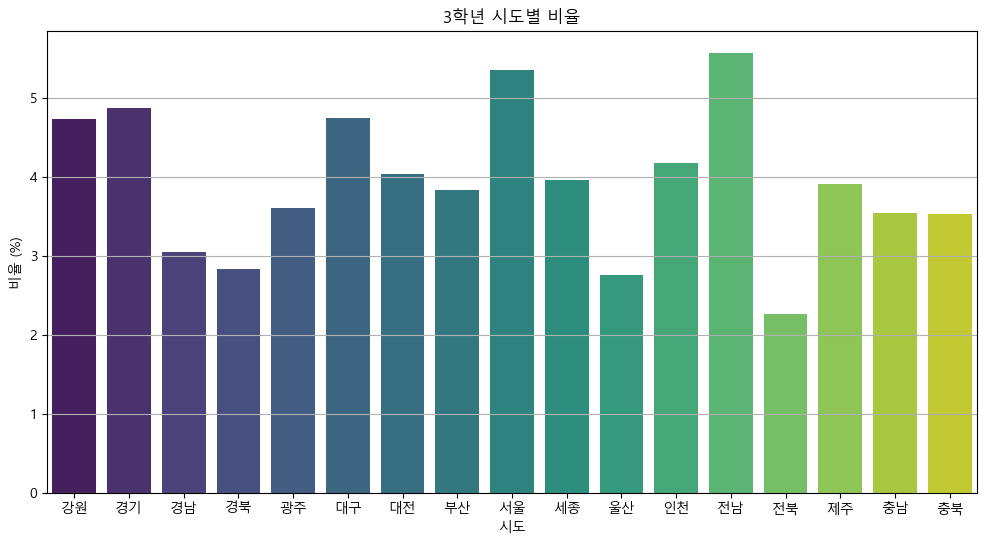

<ipython-input-85-636e59389fa2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='시도', y='비율', data=grade_data, palette='viridis')


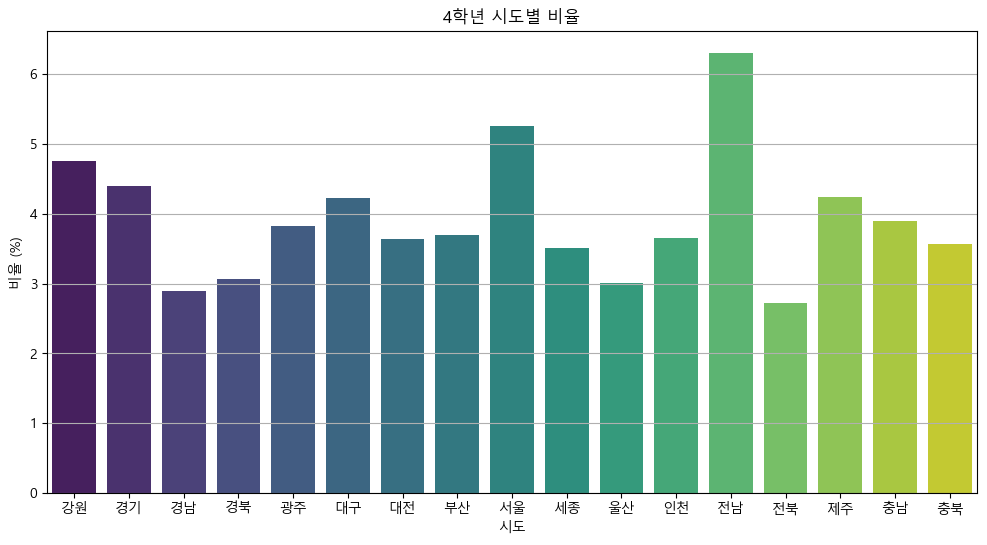

<ipython-input-85-636e59389fa2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='시도', y='비율', data=grade_data, palette='viridis')


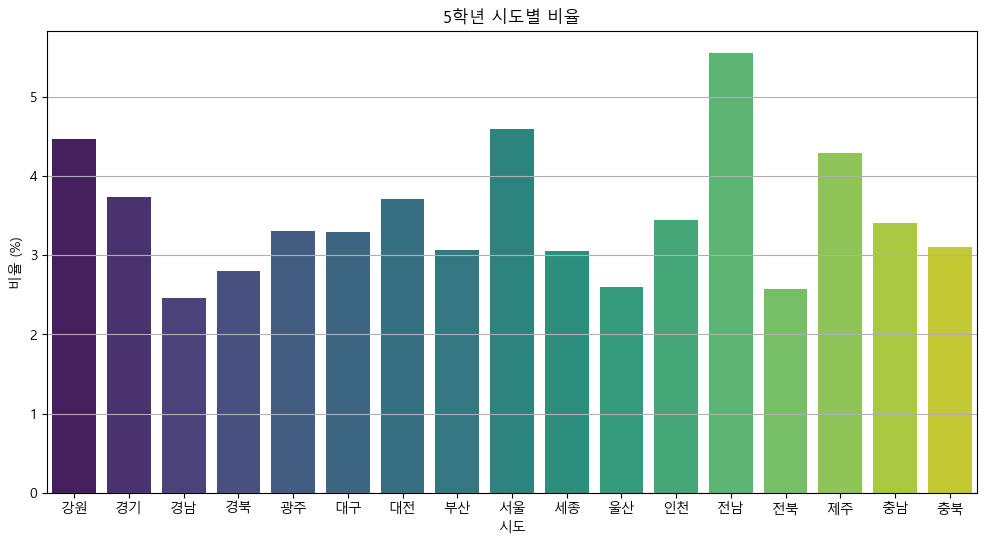

<ipython-input-85-636e59389fa2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='시도', y='비율', data=grade_data, palette='viridis')


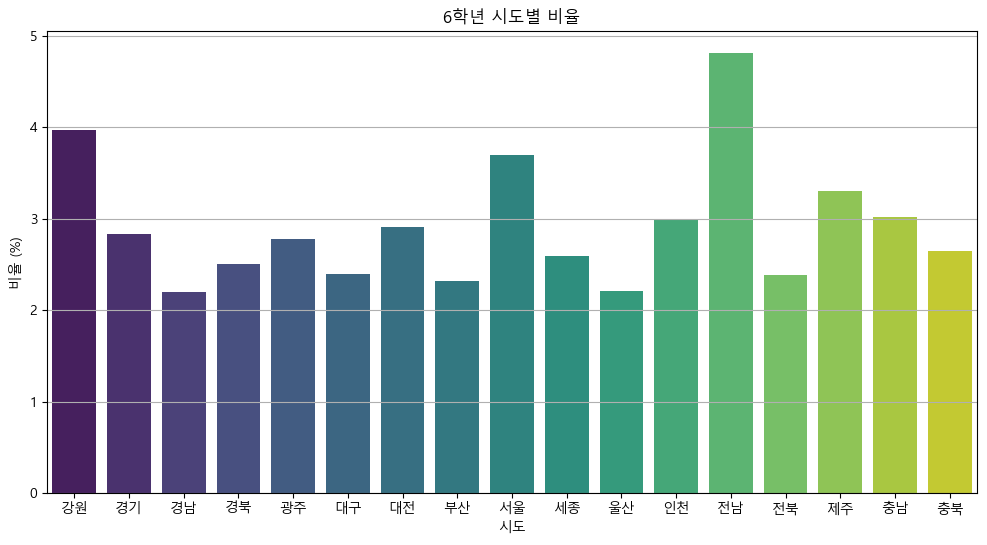

<ipython-input-85-636e59389fa2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='시도', y='비율', data=grade_data, palette='viridis')


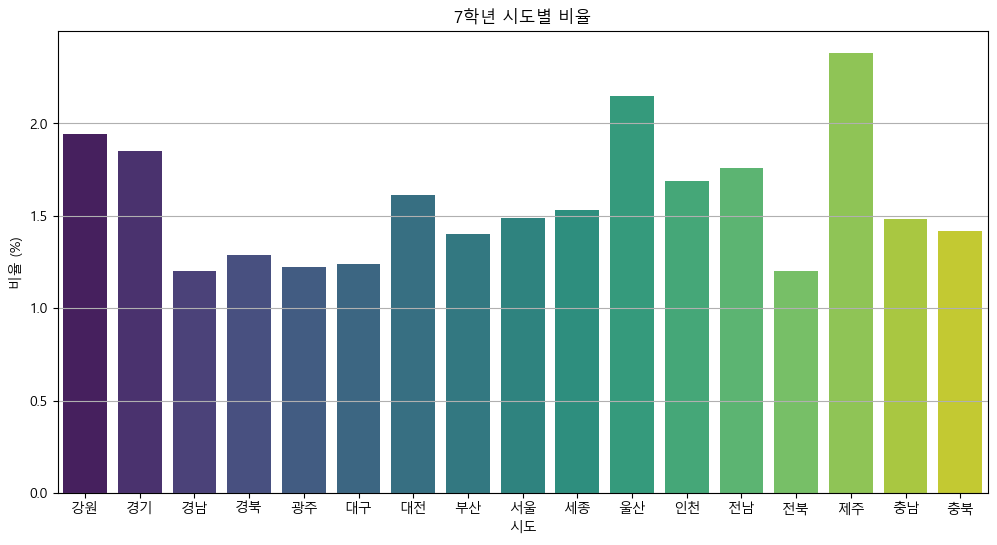

<ipython-input-85-636e59389fa2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='시도', y='비율', data=grade_data, palette='viridis')


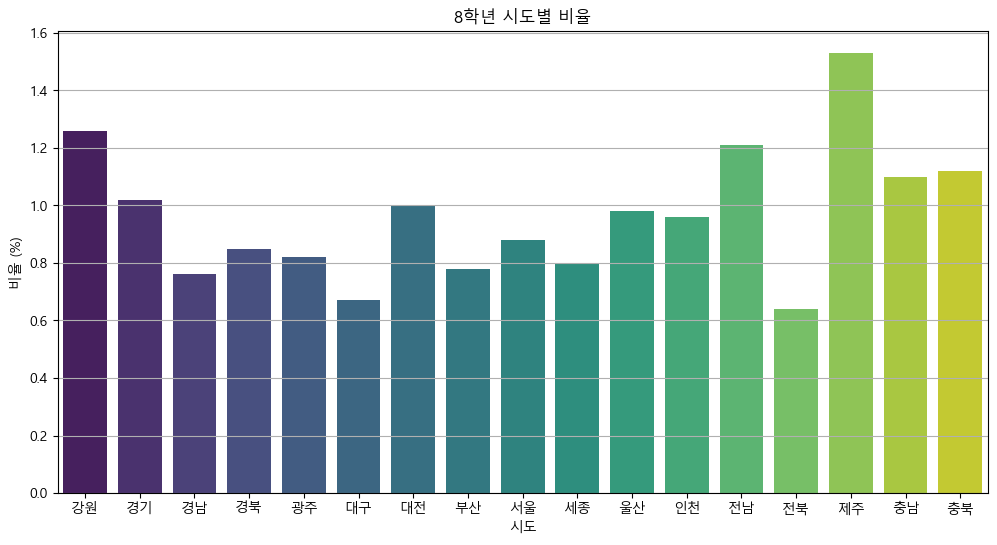

<ipython-input-85-636e59389fa2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='시도', y='비율', data=grade_data, palette='viridis')


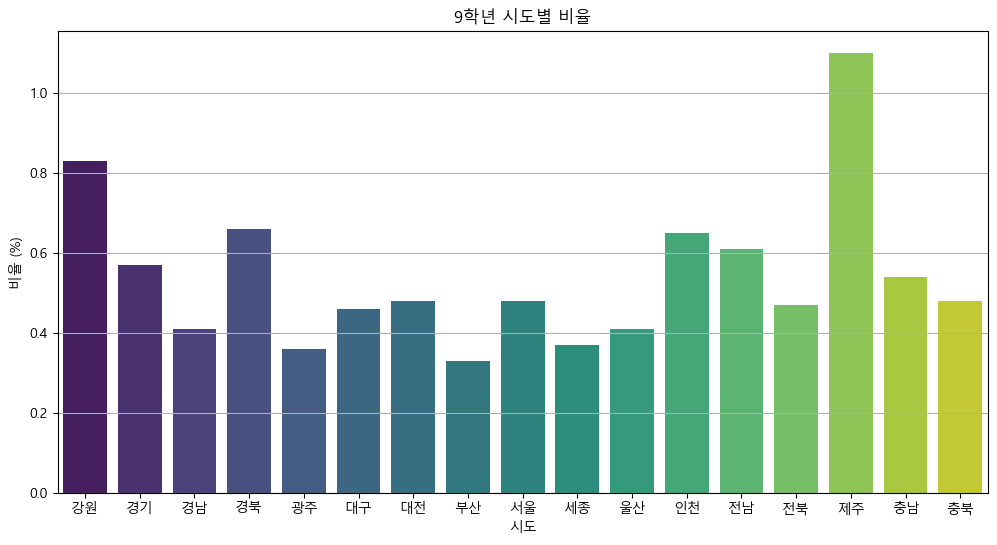

In [85]:
import seaborn as sns

# 학년별 시각화
grades = result['학년'].unique()

for grade in grades:
    grade_data = result[result['학년'] == grade]
    plt.figure(figsize=(12, 6))
    sns.barplot(x='시도', y='비율', data=grade_data, palette='viridis')
    plt.title(f'{grade} 시도별 비율')
    plt.xlabel('시도')
    plt.ylabel('비율 (%)')
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.show()

In [87]:
from scipy.stats import pearsonr

# 상관계수 계산
correlation, _ = pearsonr(result['전국학생수'], result['학생수'])
print(f'상관계수: {correlation:.2f}')

상관계수: 0.98


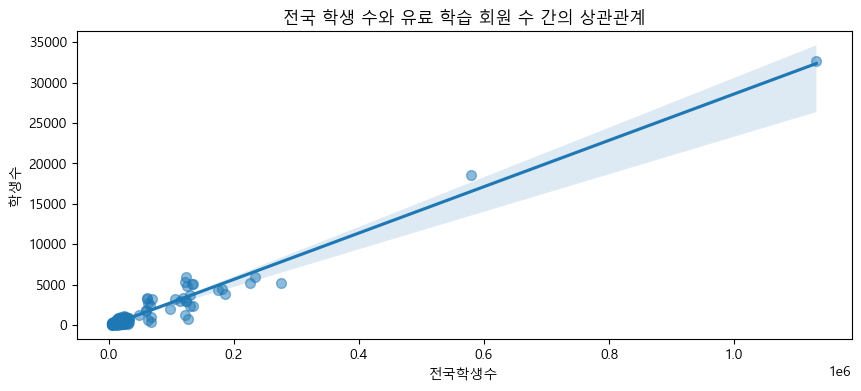

In [95]:
# 시각화

fig, ax = plt.subplots(figsize=(10, 4))
sns.regplot(x='전국학생수', y='학생수', data=result, scatter_kws={'s':50, 'alpha':0.5}, ax=ax)
ax.set_title('전국 학생 수와 유료 학습 회원 수 간의 상관관계')
ax.set_xlabel('전국학생수')
ax.set_ylabel('학생수')
fig.savefig('상관관계.png')
plt.show()

In [98]:
# 잔차 계산
result['예측값'] = np.poly1d(np.polyfit(result['전국학생수'], result['학생수'], 1))(result['전국학생수'])
result['잔차'] = result['학생수'] - result['예측값']

# 절대 잔차가 큰 상위 5개 지역 추출
top_outliers = result.loc[result['잔차'].abs().nlargest(5).index]

# 특이점 지역 출력
print("상위 5개 특이점 지역:")
print(top_outliers[['시도', '잔차']])

상위 5개 특이점 지역:
    시도           잔차
19  경기 -2807.759309
20  경남 -2615.489854
13  경기  2558.396351
18  경기 -2156.301385
80  서울  2091.255977


In [102]:
# '비율' 열을 제거
result.drop(columns='비율', inplace=True)

# 시도별 합계 계산
total_by_region = result[result['학년'] == '합계'].copy()

# 계산된 비율 추가
total_by_region['계산된 비율'] = total_by_region['학생수'] / total_by_region['전국학생수'] * 100

print("시도별 합계 분석 결과:")
print(total_by_region[['시도', '학생수', '전국학생수', '계산된 비율']])

# 유료 학습 회원 수가 낮은 지역 식별
low_membership_areas = total_by_region[total_by_region['계산된 비율'] < total_by_region['계산된 비율'].median()]

print("\n유료 학습 회원 수가 낮은 지역:")
print(low_membership_areas[['시도', '학생수', '전국학생수', '계산된 비율']])

시도별 합계 분석 결과:
     시도    학생수    전국학생수    계산된 비율
0    강원   3182   106171  2.997052
10   경기  32691  1131571  2.888992
20   경남   5181   274992  1.884055
30   경북   3792   186546  2.032743
40   광주   2944   124335  2.367797
50   대구   4413   180645  2.442913
60   대전   2931   113918  2.572903
70   부산   5238   226661  2.310940
80   서울  18617   579087  3.214888
90   세종   1198    48114  2.489920
100  울산   2019    97529  2.070153
110  인천   5980   233168  2.564674
120  전남   5029   133096  3.778476
130  전북   2318   135371  1.712331
140  제주   1764    60429  2.919128
150  충남   4329   175449  2.467384
160  충북   2935   123678  2.373098

유료 학습 회원 수가 낮은 지역:
     시도   학생수   전국학생수    계산된 비율
20   경남  5181  274992  1.884055
30   경북  3792  186546  2.032743
40   광주  2944  124335  2.367797
50   대구  4413  180645  2.442913
70   부산  5238  226661  2.310940
100  울산  2019   97529  2.070153
130  전북  2318  135371  1.712331
160  충북  2935  123678  2.373098


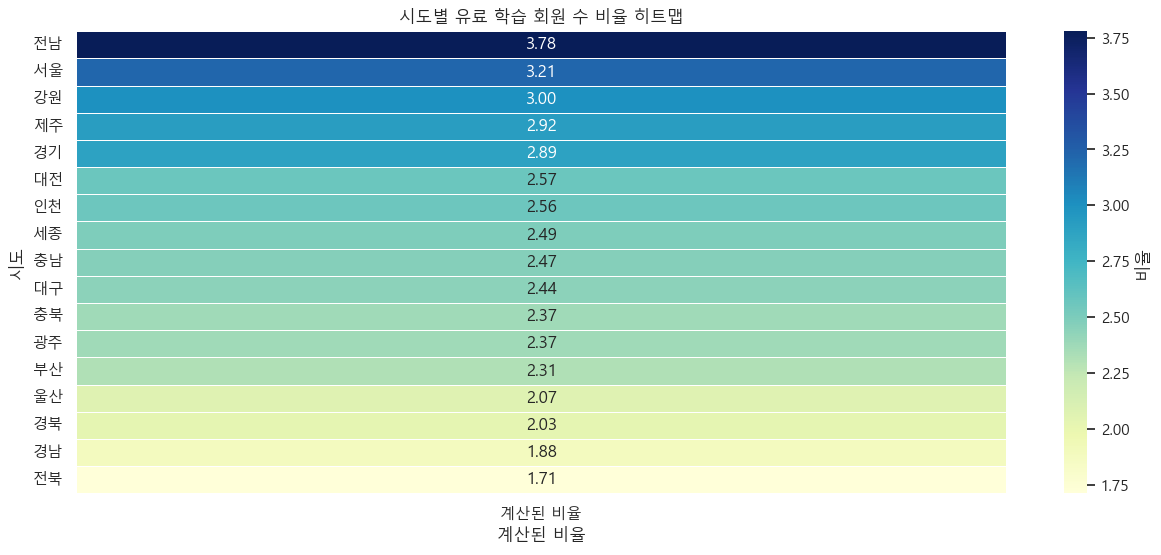

In [125]:
# squarify 설치
!pip install squarify

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify


# 비율에 따라 정렬
total_by_region = total_by_region.sort_values(by='계산된 비율', ascending=False)


# 히트맵
plt.figure(figsize=(15, 6))
heatmap_data = total_by_region[['시도', '계산된 비율']].set_index('시도')
ax = sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': '비율'}, linewidths=.5)
plt.title('시도별 유료 학습 회원 수 비율 히트맵')
plt.xlabel('계산된 비율')
plt.ylabel('시도')

# y축 라벨 각도 조정
plt.yticks(rotation=0)

# 그래프 저장
plt.savefig('시도별_유료_학습_회원_수_비율_히트맵.png')

plt.show()
